Assume we are dealing with a bivariate normal distribution, from which we have a single sample $y=\left(y_1, y_2\right)$. Our model is 

$$ y \sim ~ \mathcal{N}\left(\theta, \Sigma\right) = \mathcal{N}\left(\left[ \begin{array}{c} \theta_1 \\ \theta_2 \end{array} \right] , \left[ \begin{array}{cc} 1 & \rho \\ \rho & 1 \end{array} \right]\right)$$

where $\rho$ is a fixed (known) constant and $\theta$ is to be determined. Assume also a uniform prior distribution on $\theta$.

The Bayesian program is to find the posterior distribution over plausible values of $\theta$, given the observed data $y$:

\begin{align*}
    p\left(\theta \, \middle| \, y \right) & \propto p\left(y\,\middle|\,\theta\right) p\left(\theta\right) \\
    & \propto \mathcal{N}\left(y, \Sigma\right) \\
\end{align*}

To perform Gibbs sampling, we need the **complete conditional** distribution of each parameter. This distribution, for each parameter, is the distribution of that parameter given fixed values of all other parameters.

\begin{align*}
    p\left(\theta \, \middle| \, y\right) & \propto \exp\left( -\frac{1}{2} \left(\theta - y\right)^T \Sigma^{-1} \left( \theta - y\right)\right) \\
\end{align*}

so

\begin{align*}
    \log p\left(\theta \, \middle| \, y\right) + \text{const.} & = -\frac{1}{2} \left(\theta - y\right)^T \Sigma^{-1} \left( \theta - y\right)  \\
\end{align*}

$$ -\frac{1}{2}\frac{1}{1-\rho^2} \left[ \begin{array}{cc} \theta_1 - y_1 & \theta_2 - y_2 \end{array} \right] \left[ \begin{array}{cc} 1 & -\rho \\ -\rho & 1 \end{array}\right] \left[ \begin{array}{c} \theta_1 - y_1 \\ \theta_2 - y_2 \end{array}\right] $$

Multiply this out and focus on the terms including $\theta_1$.

\begin{align*}
    \log p\left(\theta \, \middle| \, y\right) + \text{const.} & = -\frac{1}{2\left(1-\rho^2\right)} \left[ \theta_1^2 + \left( y_1 + \rho \theta_2 - \rho y_2 \right) \theta_1 \right] \\
    & = -\frac{1}{2\left(1-\rho^2\right)} \left[\theta_1 - \left(y_1 + \rho \theta_2 - \rho y_2 \right) \right]^2
\end{align*}

so that we have

\begin{align*}
    p\left(\theta \, \middle| \, y \right) & \propto \exp\left( -\frac{\left(\theta_1 - \left(y_1 + \rho \left(\theta_2 - y_2\right)\right) \right)^2}{2\left(1-\rho^2\right)} \right) \\
\end{align*}

Note that this is the exact form of a univariate normal distribution.

From the definition of conditional probability, we have

\begin{align*}
    p\left(\theta_1 \, \middle| \, \theta_2 ,y \right) & = p\left(\theta_1, \theta_2 \, \middle| \, y\right) / p\left(\theta_2 \, \middle| \, y\right) \\
    & \propto p\left(\theta_1, \theta_2 \, \middle| \, y\right) \\ 
\end{align*}

Thus, by comparison with our above derivation, we have the complete conditional

$$ \theta_1 | \theta_2, y \sim \mathcal{N}\left(y_1 + \rho \left(\theta_2 - y_2\right), 1- \rho^2 \right) $$

By symmetry, the other complete conditional is

$$ \theta_2 | \theta_1, y \sim \mathcal{N}\left(y_2 + \rho \left(\theta_1 - y_1\right), 1- \rho^2 \right) $$

The Gibbs sampler algorithm gives us samples from the posterior distribution by alternatingly sampling from the complete conditional distributions. The heavy lifting here is to actually compute those complete conditionals.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [22]:
def gibbs_sampler_11_2(theta, rho = 0.8, n_iters = 10):
    data = np.array([[0.0, 0.0]])

    history = [ theta.copy() ]

    means = np.zeros(2, dtype=float)
    scale = (1 - rho**2)

    for iter in range(n_iters):
        mean = data[0, 0] + rho * (theta[1] - data[0, 1])
        theta[0] = ss.norm(mean, scale).rvs() # sample from complete conditional for theta_1
        history.append(theta.copy())
        
        mean = data[0, 1] + rho * (theta[0] - data[0, 0])
        theta[1] = ss.norm(mean, scale).rvs() # sample from complete conditional for theta_2
        history.append(theta.copy())

    return np.stack(history)

def plot_history(h, ax):
    ax.plot(h[:,0], h[:,1])
    ax.scatter(h[0,0], h[0,1], marker='s')

def plot_samples(h, ax):
    samples = h[0::2, :]
    ax.scatter(samples[:,0], samples[:,1], marker='.')
    

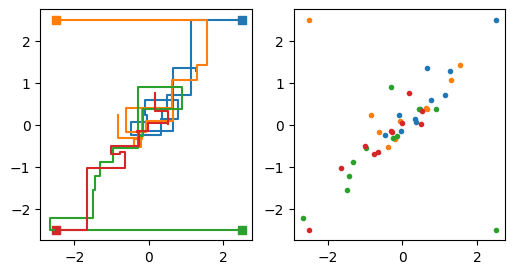

In [27]:
init_pts = [
    [2.5, 2.5],
    [-2.5, 2.5],
    [2.5, -2.5],
    [-2.5, -2.5],
    ]

fig, ax = plt.subplots(figsize=(6,3), ncols=2)
for theta in init_pts:
    history = gibbs_sampler_11_2(theta)
    plot_history(history, ax[0])
    plot_samples(history, ax[1])
plt.show()

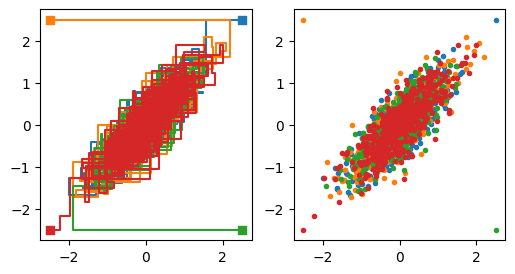

In [28]:
init_pts = [
    [2.5, 2.5],
    [-2.5, 2.5],
    [2.5, -2.5],
    [-2.5, -2.5],
    ]

fig, ax = plt.subplots(figsize=(6,3), ncols=2)
for theta in init_pts:
    history = gibbs_sampler_11_2(theta, n_iters=500)
    plot_history(history, ax[0])
    plot_samples(history, ax=ax[1])
plt.show()